<a href="https://colab.research.google.com/github/7692TITO/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> 1.Problem Statement </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.


## <b> 2.Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##3.Importing Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [189]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [190]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Importing the dataset

credit_df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection/default of credit card clients.csv')

## 4.Dataset Inspection

In [192]:
credit_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [193]:
credit_df.shape

(30001, 25)

In [194]:
credit_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [195]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

##Renaming the Dataset
1.**Renamed the columns using the first record given in the dataset and dropped the first record.**

2.**Renamed our target variable to defaulter and PAY_0 column to PAY_1**

3.**Converted the datatypes of all columns from object to int datatype because all columns contains numerical values.**

4.**Drop the ID column from the dataset,since its not an influential feature in our modeling**

In [196]:
# Renaming the columns in the dataset
credit_df.rename(columns= credit_df.loc[0,:],inplace=True)

In [197]:
# Dropping the first record after renaming the columns
credit_df= credit_df[1:]

In [198]:
#Renaming the column name PAY_0
credit_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'defaulter'},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [199]:
# Converting the datatype from object to integer in all the columns
credit_df = credit_df.astype(object).astype(int)

In [200]:
credit_df.drop(labels='ID',inplace=True,axis=1)

In [201]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [202]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##The  Dataset Inspection Summary 
1. **The average credit card limit/consumer credit amount is 167484.32(NT Dollars)**
2. **The maximum number of credit card holders were females in Taiwan.**
3. **The given dataset consist of 30000 rows and 24 columns**
4. **The feature 'defaulter'  is our dependent/target feature**
5. **The most number of credit card holders were having university degree education.**
6. **The most of the customers marriage status was Single, who carries a credit card.** 



##5.Handling Missing Data

In [203]:
#check for null values
credit_df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulter    0
dtype: int64

In [204]:
#check for duplicate rows
credit_df.duplicated().sum()

35

In [205]:
#dropping duplicate rows
credit_df = credit_df.drop_duplicates()

In [206]:
credit_df.duplicated().sum()

0

In [207]:
#Check for imbalance data in Target Feature
(credit_df['defaulter'].value_counts()/len(credit_df['defaulter'])*100)

0    77.874187
1    22.125813
Name: defaulter, dtype: float64

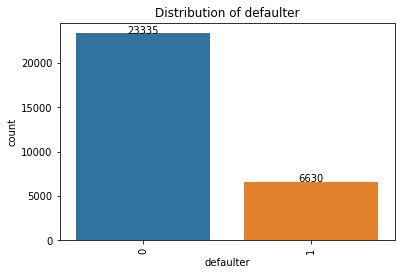

In [208]:
ax = sns.countplot(x=credit_df['defaulter']);
plt.title('Distribution of defaulter')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

##Handling Missing data Summary
1. **Tha given dataset does not contain any missing values**
2. **The given dataset contained 35 duplicate rows and we have dropped duplicate records.**
3. **The target variable consist of imbalance data with 77.87% Non defaulters(0 value) and 22.12% 1 defaulters (1 value).**



##6.Data Cleaning/ Feature Engineering

1.**Replaced 0 class in marriage column into class 3='others'.**

2.**Similarly, we replaced few classes like 0, 5 and 6 in education column into class 4='others' using a fuction name education.** 

3.**Replaced negative values in payment history columns i.e (PAY_1,PAY_2...PAY_6)
into class 0 -pay duly on time.** 

**Replacing few classes in MARRIAGE and EDUCATION variables**

In [209]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [210]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [211]:
credit_df['MARRIAGE'].replace(to_replace=0,value=3,inplace=True)

In [212]:
def education(value):
  if value> 4:
    value = 4
  elif value==0:
    value= 4
  else:
    value
  return value


In [213]:
credit_df['EDUCATION']= credit_df['EDUCATION'].apply(education)

In [214]:
credit_df['MARRIAGE'].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

In [215]:
credit_df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

**Replaced negative values in payment history columns**

In [216]:
payment_list = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [217]:
for var in payment_list:
  credit_df.loc[(credit_df[var] == -1) | (credit_df[var]==-2),var]=0

In [218]:
credit_df.PAY_1.value_counts()

0    23169
1     3667
2     2666
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

**New Features derived from exisiting features**

In [219]:
credit_df['Total_Bill_AMT']=credit_df['BILL_AMT1']	+ credit_df['BILL_AMT2']+ credit_df['BILL_AMT3']	+ credit_df['BILL_AMT4']	+ credit_df['BILL_AMT5']	+ credit_df['BILL_AMT6']

In [220]:
credit_df['Total_Paid_AMT']= credit_df['PAY_AMT1']	+ credit_df['PAY_AMT2']+ credit_df['PAY_AMT3']	+ credit_df['PAY_AMT4']	+ credit_df['PAY_AMT5']	+ credit_df['PAY_AMT6']

In [221]:
credit_df['Pending_Payment_AMT']= credit_df['Total_Bill_AMT']- credit_df['Total_Paid_AMT']

In [222]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT'],
      dtype='object')

##7.Exploratory Data Analysis and Visualization

##UNIVARIATE ANALYSIS

##MARRIAGE

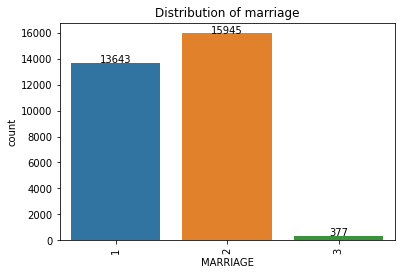

In [223]:
ax = sns.countplot(x=credit_df['MARRIAGE']);
plt.title('Distribution of marriage')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**The above countplot tell us clearly that the most number of credit card holders were Single**

##EDUCATION

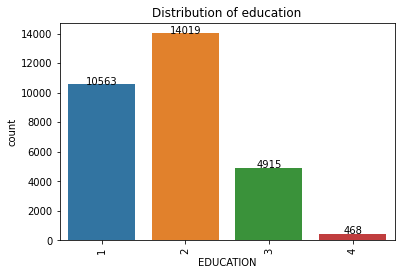

In [224]:
ax = sns.countplot(x=credit_df['EDUCATION']);
plt.title('Distribution of education')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**The above countplot tells us that the most number of credit card holders were having a university degree**

##SEX

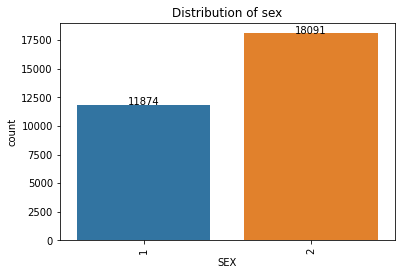

In [225]:
ax = sns.countplot(x=credit_df['SEX']);
plt.title('Distribution of sex')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

**The above figure tells us that the most number of credit card holders were females**

##AGE

Text(0.5, 1.0, 'Distribution of Age')

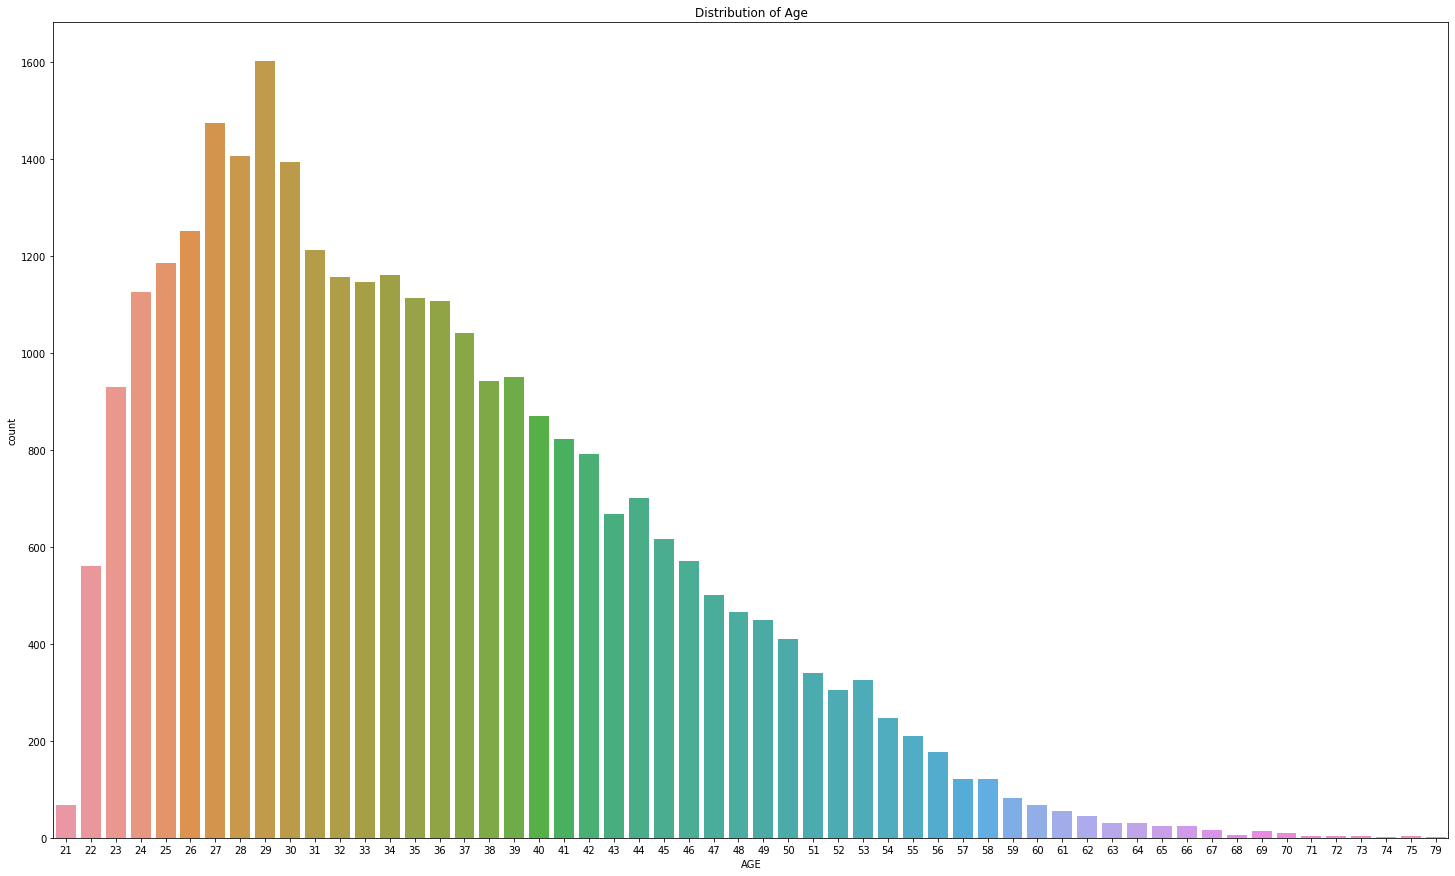

In [226]:
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (25,15))
sns.countplot(x = 'AGE', data = credit_df)
plt.title('Distribution of Age')


**The above figure shows the coutplot of Age column with the most frequent number of range of  the credit card holder age was between 25-34.**

**The credit card holder with age of 29 has the highest proportion**

##Repayment Status (Payment History)

In [227]:
def PayColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

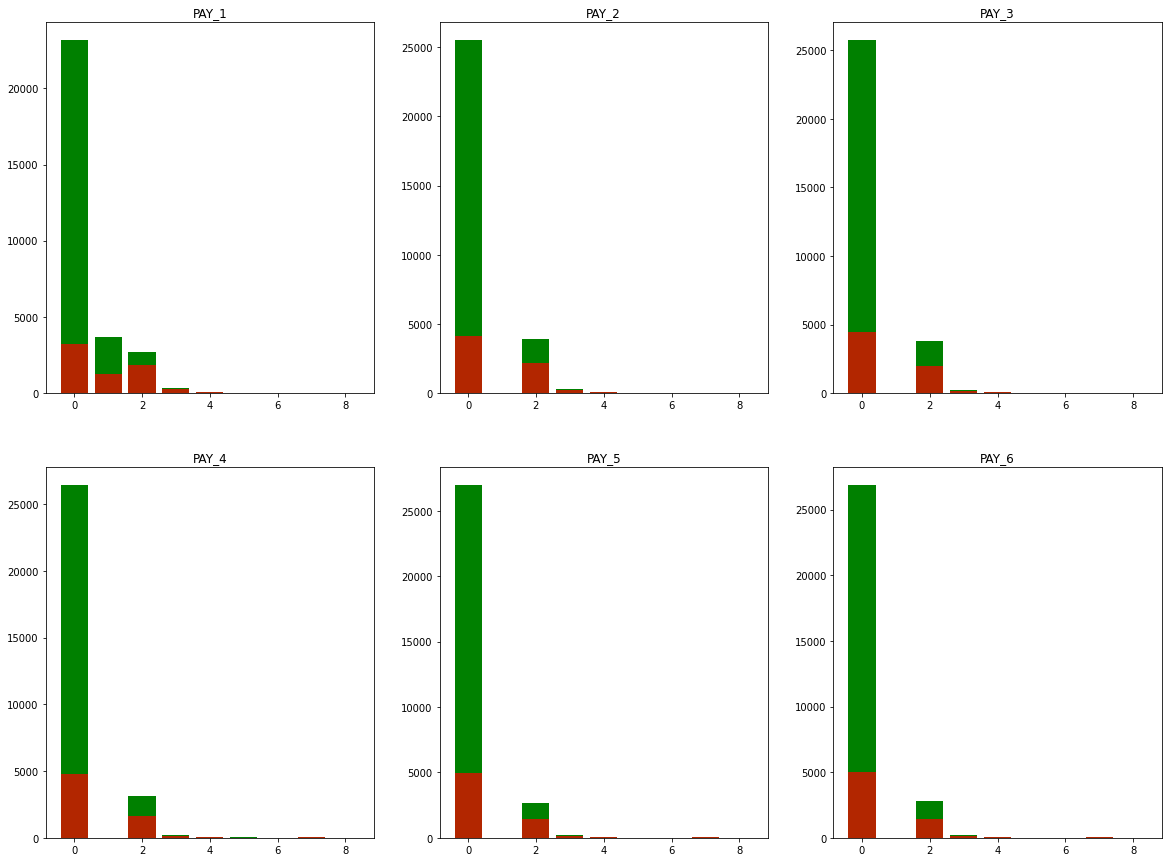

In [228]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_columns = PayColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(20,15)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    x  = credit_df[pay_columns[i]].value_counts()
    y = credit_df[pay_columns[i]][(credit_df['defaulter']==1)].value_counts()
    ax[row,col].bar(x.index, x, align='center', color='green')
    ax[row,col].bar(y.index, y, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_columns[i])
   


    
plt.show()

**The above figure shows the bar plot of payment history status for past six  months starting from September to April , which show the count of defaulters and non-defaulter**

##Previous Amount Paid (PAY_AMT)

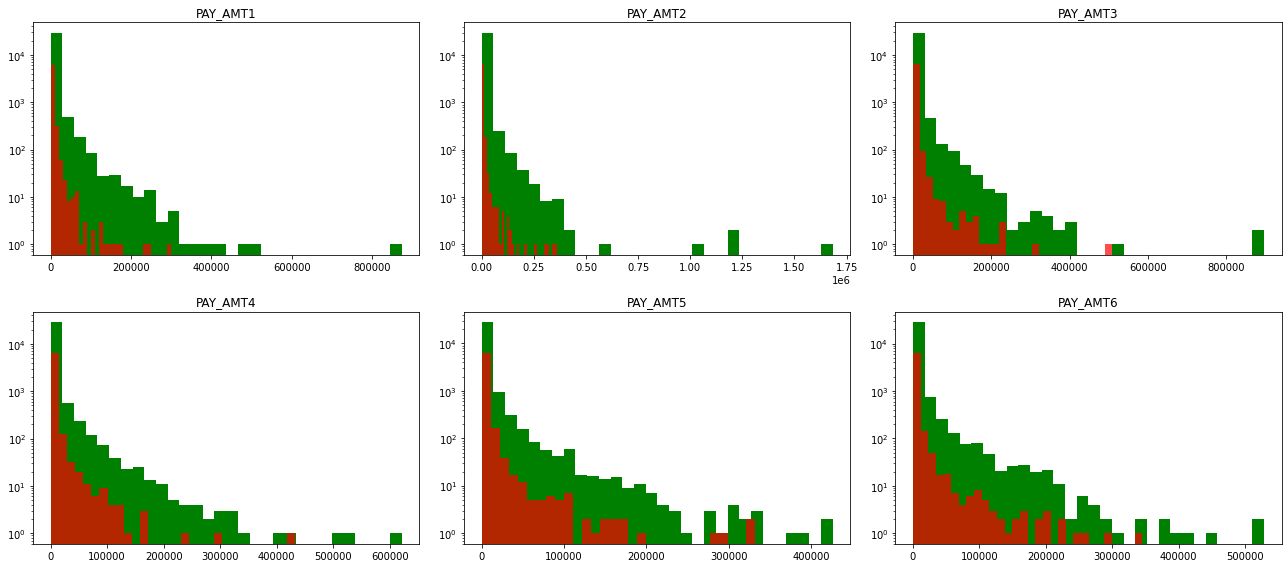

In [229]:
pay_amt_columns = PayColumnsNames('PAY_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[pay_amt_columns[i]][(credit_df['defaulter']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')


    
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of payment amount for each month explicitly for defaulters after scaling the data using log transform** 

##Bill Amount

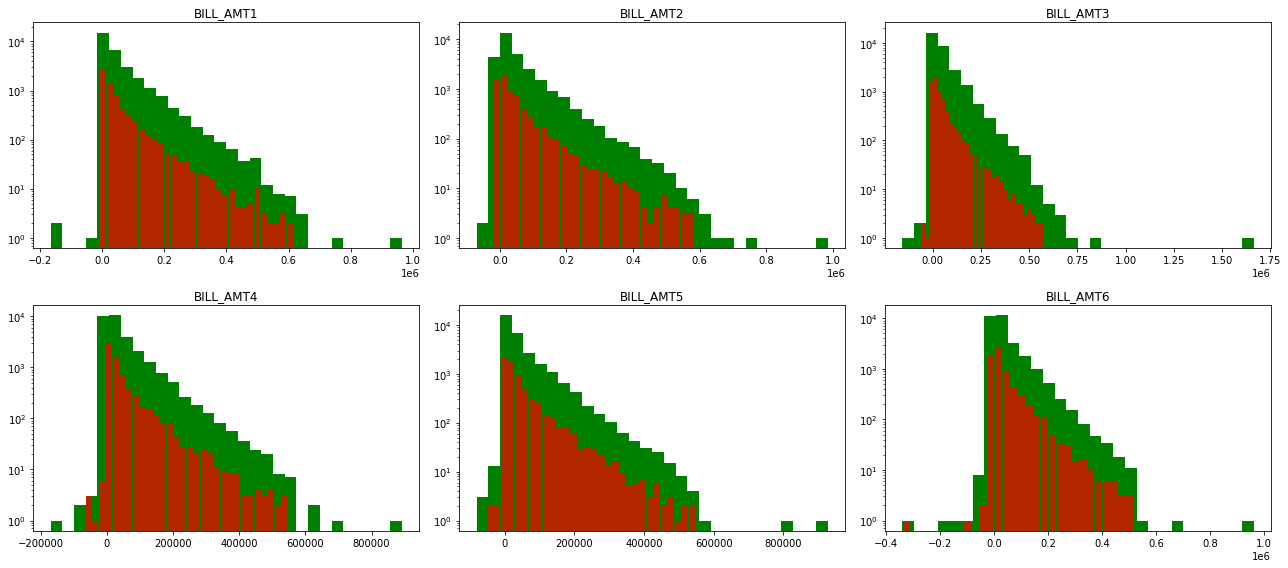

In [230]:
bill_amt_columns = PayColumnsNames('BILL_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[bill_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[bill_amt_columns[i]][(credit_df['defaulter']==1)],30,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')


    
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters**

##BI-VARIATE ANALYSIS

##Defaulter vs Sex

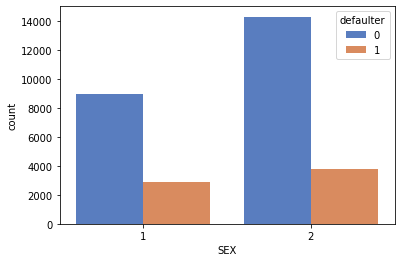

In [231]:
# Checking the number of counts of defaulters and non defaulters sex-wise


sns.countplot(x='SEX', data=credit_df,hue="defaulter", palette="muted")  

In [232]:
credit_df.loc[credit_df['SEX']==2,'defaulter'].value_counts()

0    14330
1     3761
Name: defaulter, dtype: int64

**It is evident from the above count plot output that males have overall less default payments w.r.t females**

**Both in Defaulter and Non-Defaults count, females were having higher proportion  (Sex=2)**

##Defaulter vs Education

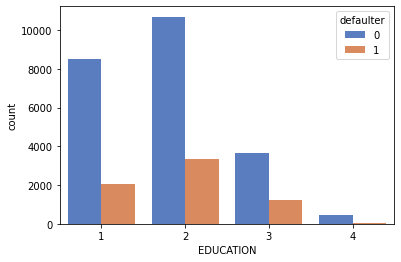

In [233]:
# Checking the number of counts of defaulters and non defaulters education-wise


sns.countplot(x='EDUCATION', data=credit_df,hue="defaulter", palette="muted")  

In [234]:
credit_df.loc[credit_df['EDUCATION']==2,'defaulter'].value_counts()

0    10691
1     3328
Name: defaulter, dtype: int64

**The credit card holders with a university degree were the customers with the highest number of default payment.**

##Defaulter vs Marriage

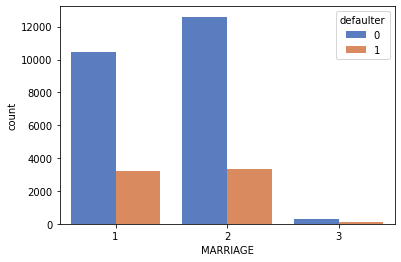

In [235]:
# Checking the number of counts of defaulters and non defaulters marriage-wise


sns.countplot(x='MARRIAGE', data=credit_df,hue="defaulter", palette="muted") 

In [236]:
credit_df.loc[credit_df['MARRIAGE']==2,'defaulter'].value_counts()

0    12605
1     3340
Name: defaulter, dtype: int64

**It is evident from the above plot that the credit card holders who were singles used to do the highest number of default in payments**

##Multi-variate Analysis

##SEX VS CREDIT LIMIT VS EDUCATION

Text(0.5, 1.0, 'Multivariate Analysis(Sex/Limit_Bal/Education')

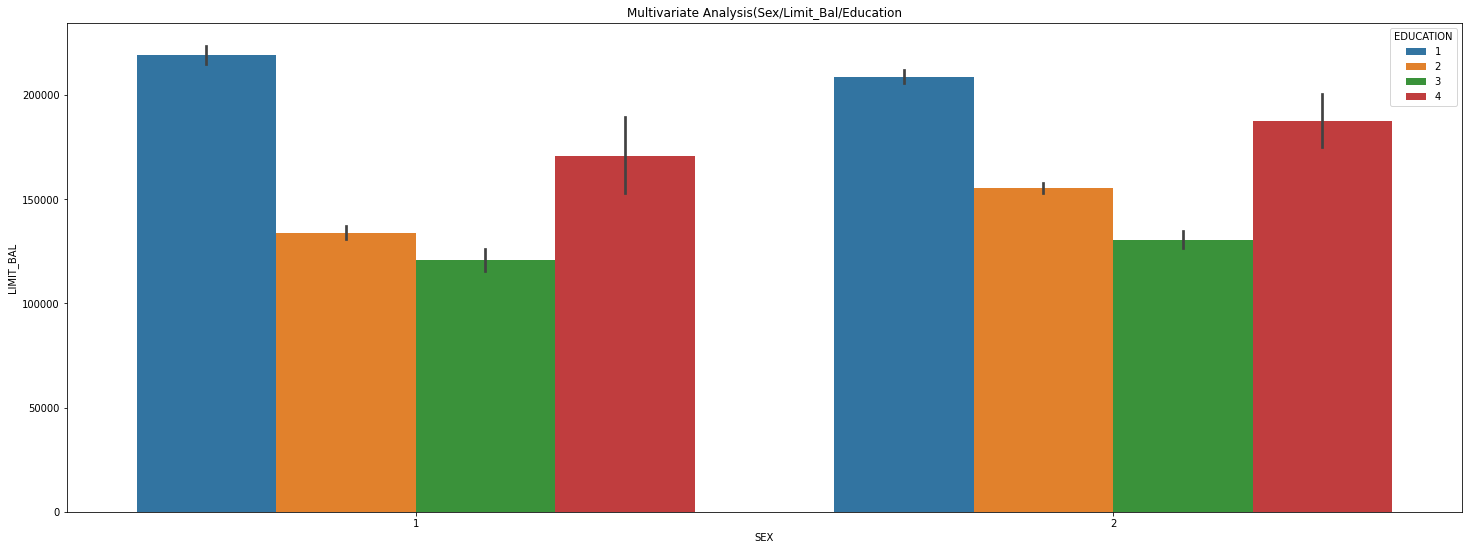

In [237]:
plt.figure(figsize=(25,9))
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit_df,hue='EDUCATION')
plt.title('Multivariate Analysis(Sex/Limit_Bal/Education')

**The above figure tells us that  the highest LIMIT_BAL/credit limit amount is given to the graduate education credit card holders in both the sex.**

**On the contrary, the least credit limit amount is given to the high school education credit card holders in both the sex.**


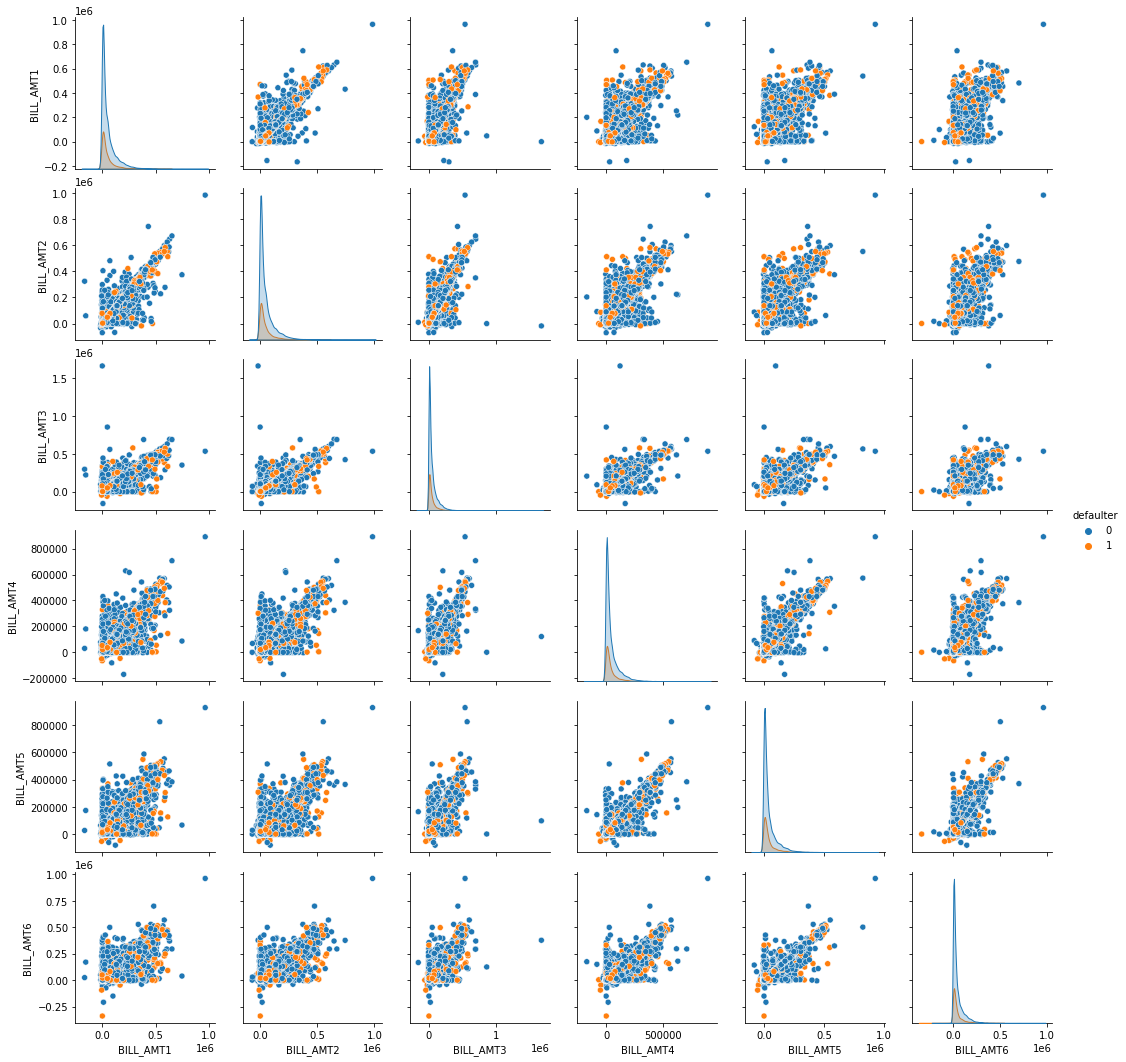

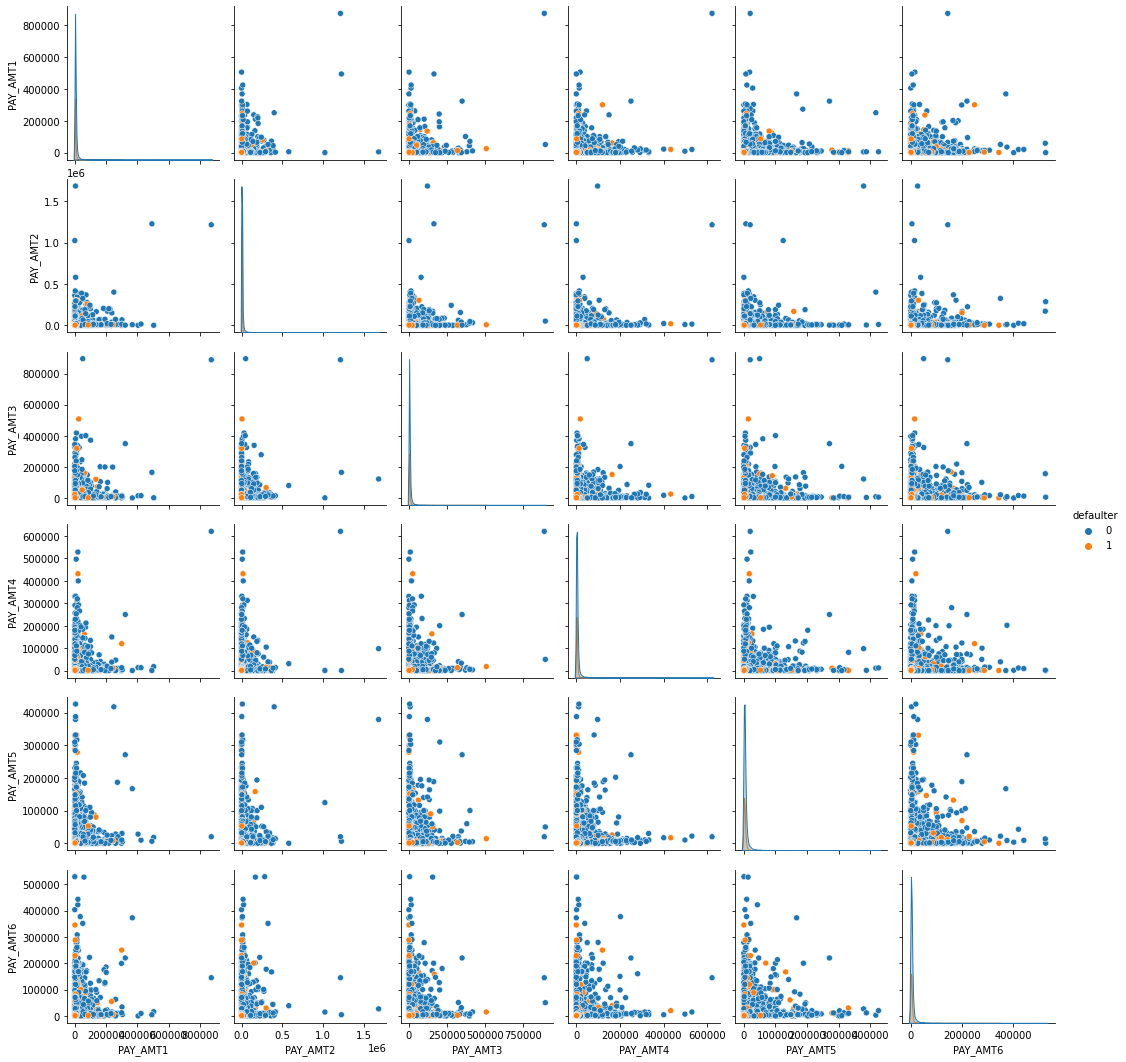

In [238]:
# plot columns with similar names using pairplot

sns.pairplot(credit_df, vars=credit_df.columns[11:17], kind='scatter',hue= 'defaulter')
sns.pairplot(credit_df, vars=credit_df.columns[17:23],hue = 'defaulter')

##8.Handling Outliers

In [239]:
# find Numerical variables
numerical = [var for var in credit_df.columns if credit_df[var].dtype !='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 27 numerical variables


In [240]:
discrete = []
for var in numerical:
    if len(credit_df[var].unique())<20:
        print(var, ' values: ', credit_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

SEX  values:  [2 1]
EDUCATION  values:  [2 1 3 4]
MARRIAGE  values:  [1 2 3]
PAY_1  values:  [2 0 1 3 4 8 7 5 6]
PAY_2  values:  [2 0 3 5 7 4 1 6 8]
PAY_3  values:  [0 2 3 4 6 7 1 5 8]
PAY_4  values:  [0 2 3 4 5 7 6 1 8]
PAY_5  values:  [0 2 3 5 4 7 8 6]
PAY_6  values:  [0 2 3 6 4 7 8 5]
defaulter  values:  [1 0]
There are 10 discrete variables


In [241]:
# outlies in discrete variables
for var in discrete:
    print(credit_df[var].value_counts() / np.float(len(credit_df)))
    print()

2    0.603738
1    0.396262
Name: SEX, dtype: float64

2    0.467846
1    0.352511
3    0.164025
4    0.015618
Name: EDUCATION, dtype: float64

2    0.532121
1    0.455298
3    0.012581
Name: MARRIAGE, dtype: float64

0    0.773202
1    0.122376
2    0.088970
3    0.010746
4    0.002536
5    0.000868
8    0.000634
6    0.000367
7    0.000300
Name: PAY_1, dtype: float64

0    0.851927
2    0.131020
3    0.010879
4    0.003304
1    0.000934
5    0.000834
7    0.000667
6    0.000400
8    0.000033
Name: PAY_2, dtype: float64

0    0.859436
2    0.127449
3    0.008009
4    0.002503
7    0.000901
6    0.000768
5    0.000701
1    0.000133
8    0.000100
Name: PAY_3, dtype: float64

0    0.882897
2    0.105423
3    0.006007
4    0.002269
7    0.001936
5    0.001168
6    0.000167
1    0.000067
8    0.000067
Name: PAY_4, dtype: float64

0    0.900984
2    0.087636
3    0.005940
4    0.002770
7    0.001936
5    0.000567
6    0.000133
8    0.000033
Name: PAY_5, dtype: float64

0    0.897280
2    0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


**Plotting outliers in discrete variables**

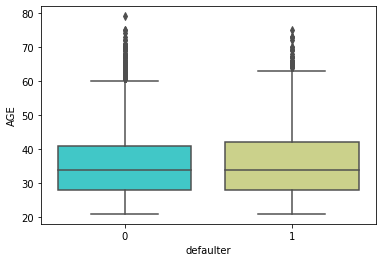

In [242]:
sns.boxplot(x='defaulter',y='AGE',data=credit_df,palette='rainbow')

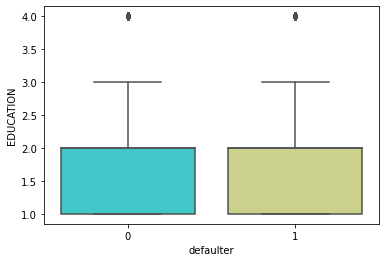

In [243]:
sns.boxplot(x='defaulter',y='EDUCATION',data=credit_df,palette='rainbow')

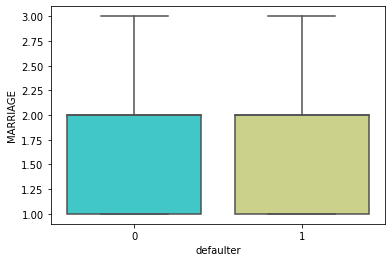

In [244]:
sns.boxplot(x='defaulter',y='MARRIAGE',data=credit_df,palette='rainbow')

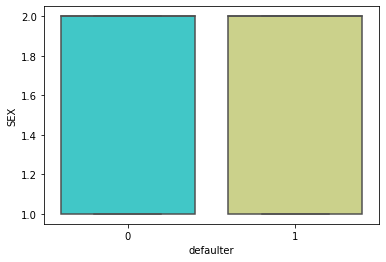

In [245]:
sns.boxplot(x='defaulter',y='SEX',data=credit_df,palette='rainbow')

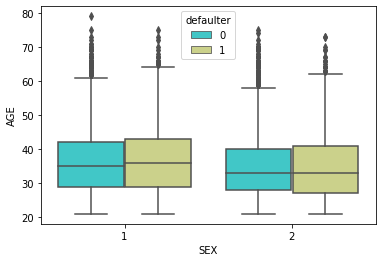

In [246]:
sns.boxplot(x='SEX',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")

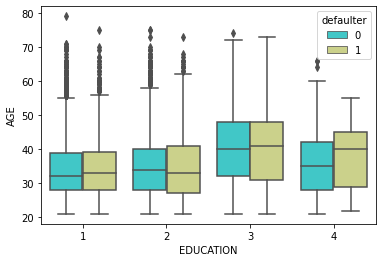

In [247]:
sns.boxplot(x='EDUCATION',hue='defaulter', y='AGE',data=credit_df,palette="rainbow" )

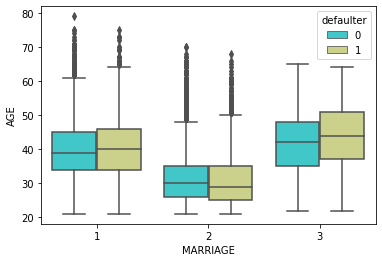

In [248]:
sns.boxplot(x='MARRIAGE',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")

**Plotting outliers in continuous variables**

In [249]:
continuous = [var for var in numerical if var not in discrete ]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


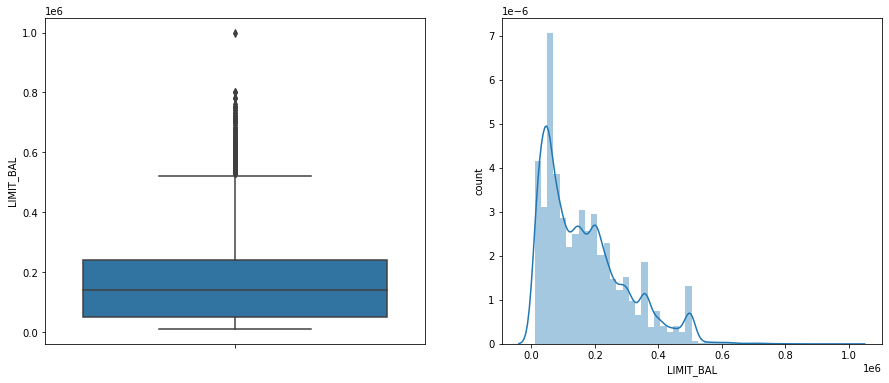

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


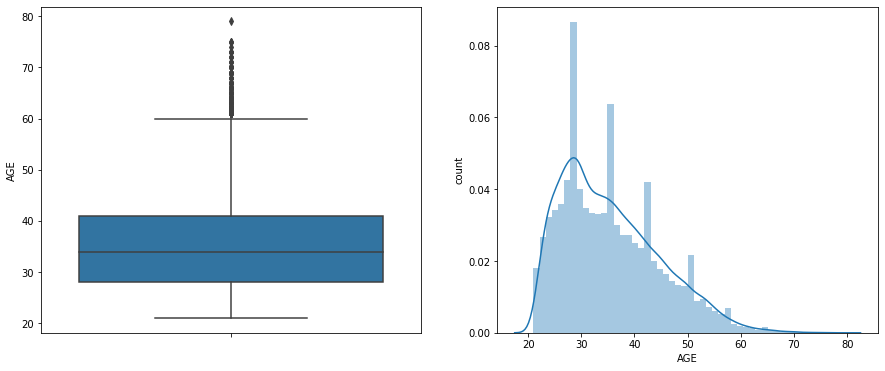

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


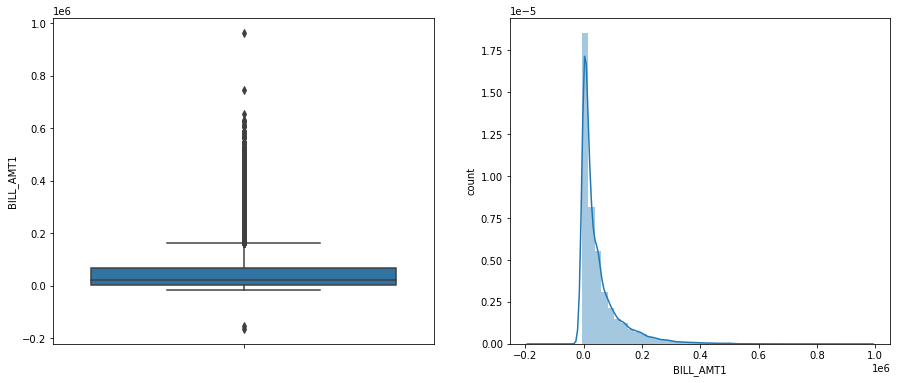

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


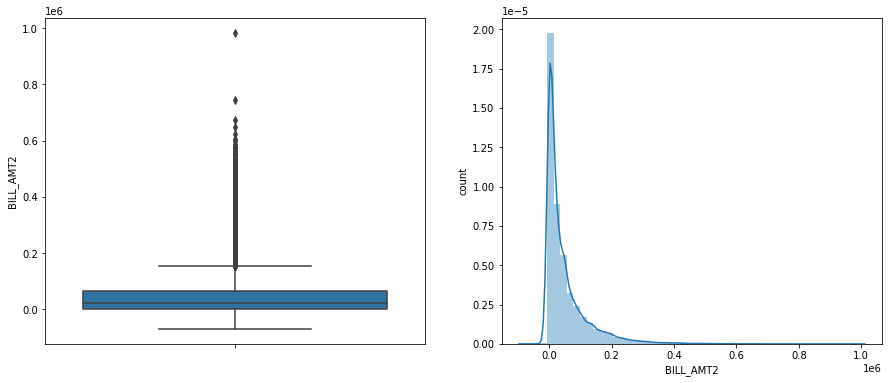

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


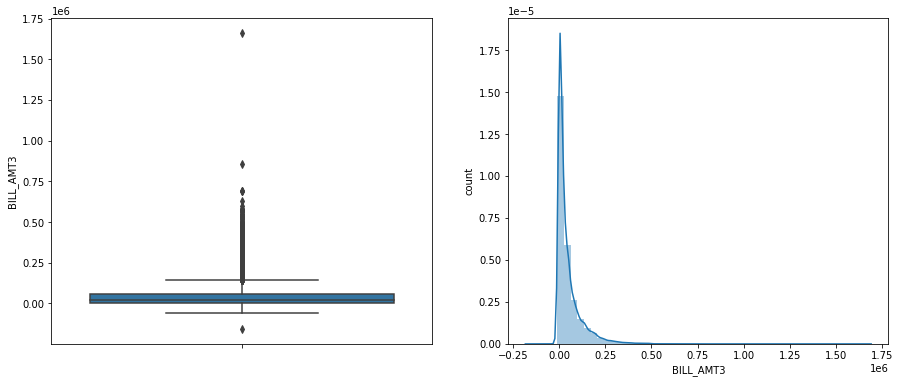

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


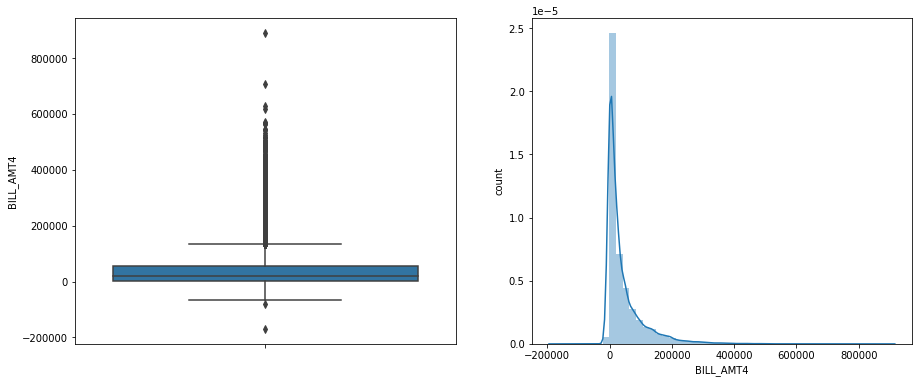

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


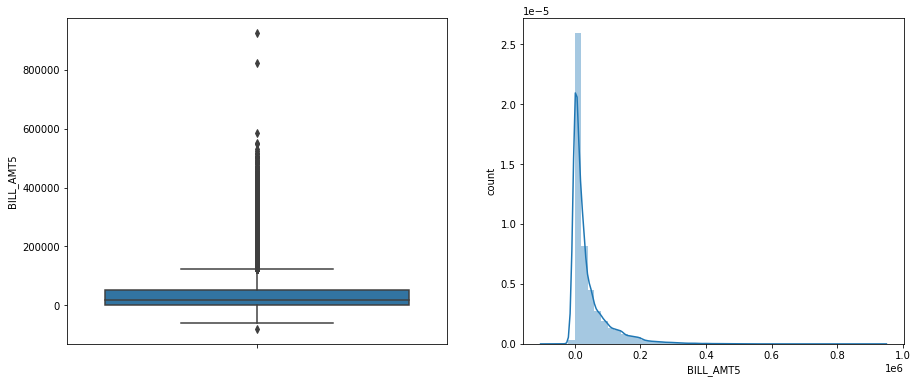

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


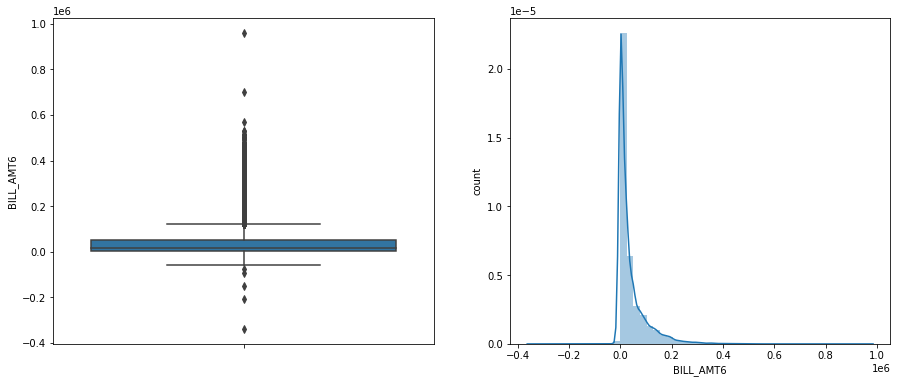

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


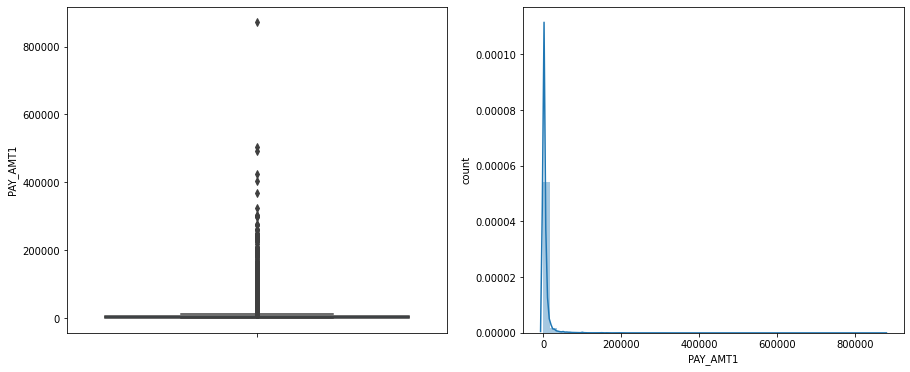

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


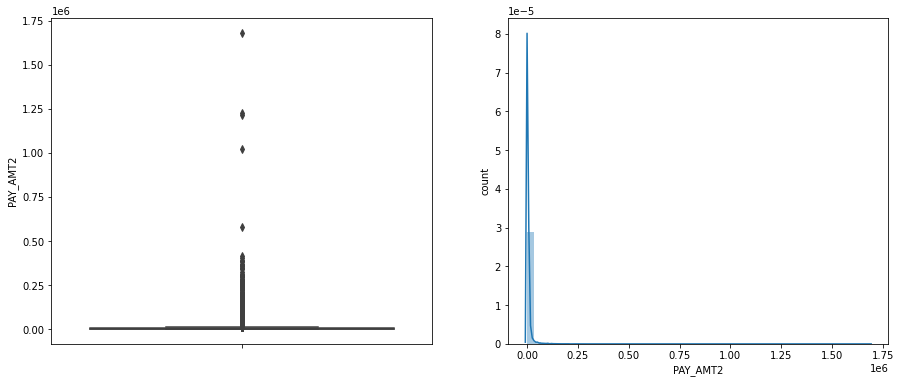

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


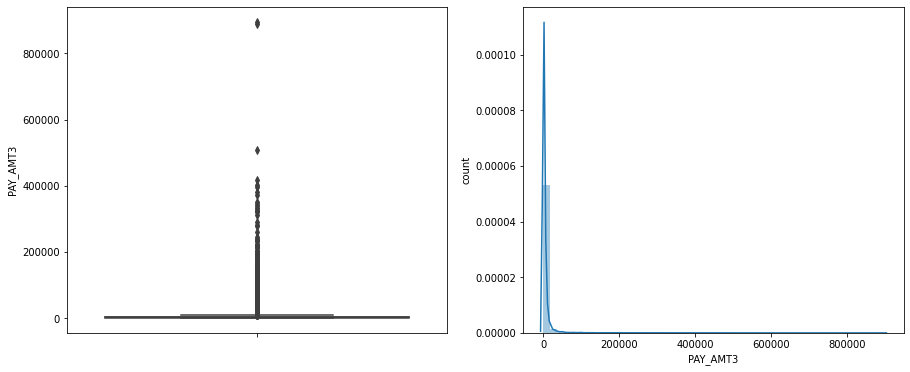

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


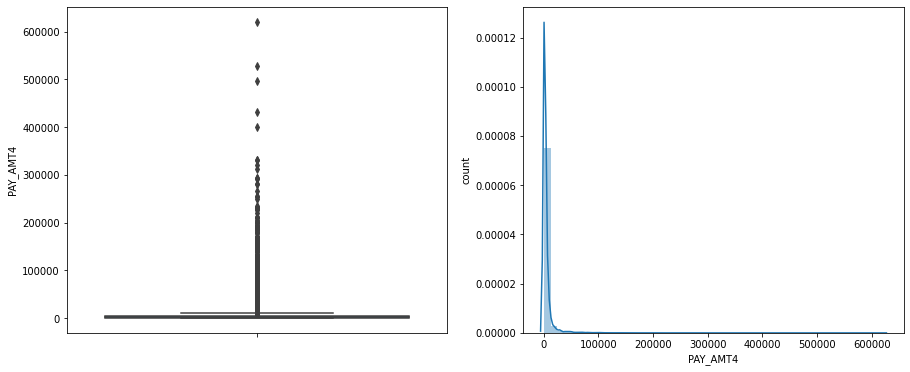

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


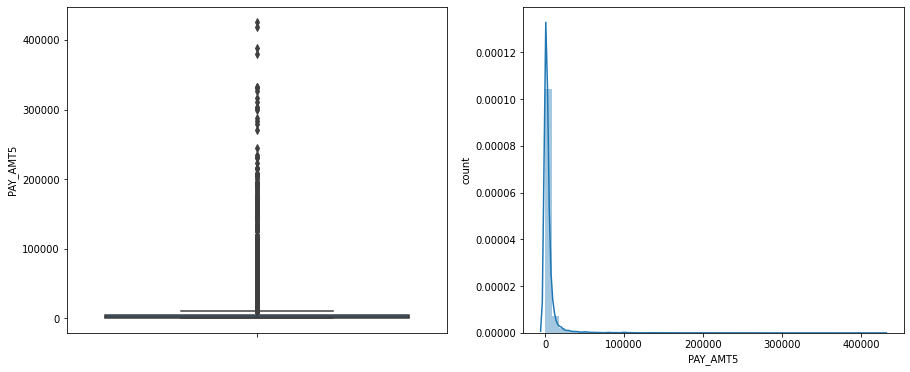

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


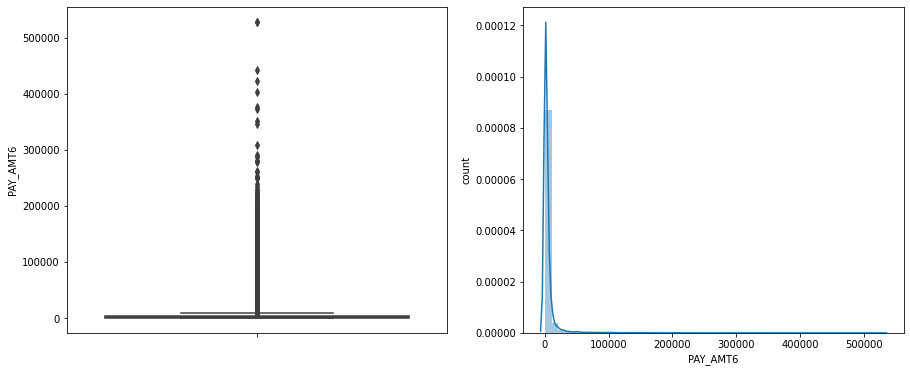

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


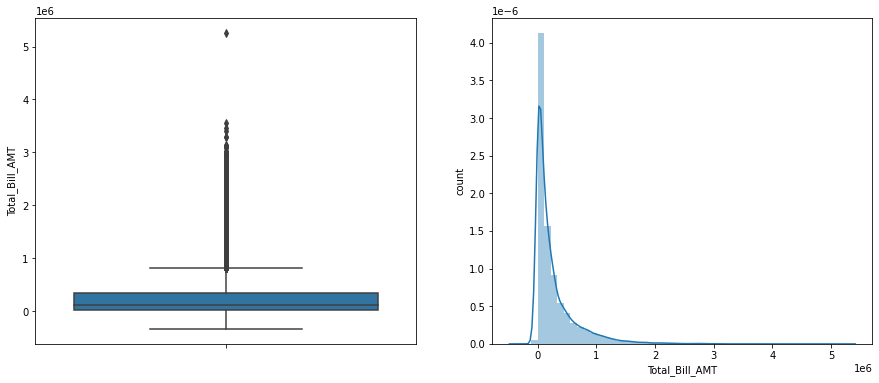

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


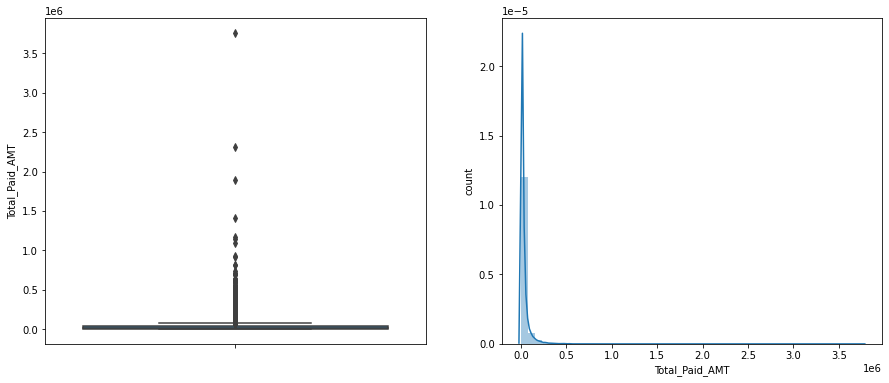

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


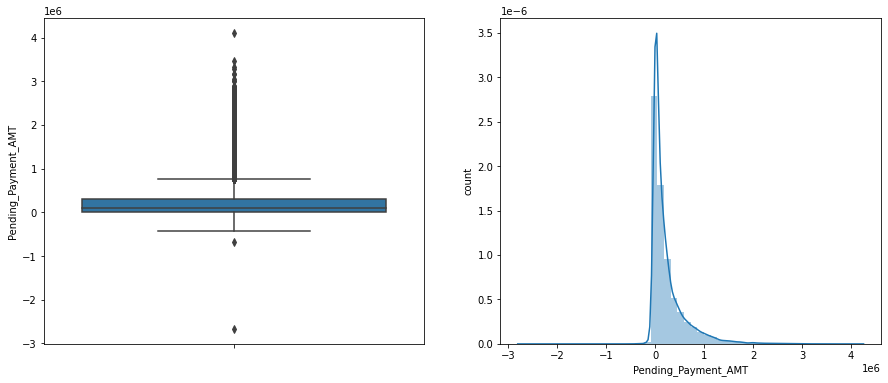

In [250]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=credit_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(credit_df[var].dropna())
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous and discrete variables seem to contain outliers. In addition, the majority of the variables are not normally distributed.

We are not removing any of the outliers as of now because it may lead to information loss since our dataset is small and our model will not be able to train well if we remove few records due to outliers . 

It's not always adviced to remove outliers to increase the accuracy of the model,our data records are compartively low in number.Hence we have decided not to remove the outliers as of now

##8.Feature Selection 

##Correlation between features

In [251]:
correlation = credit_df.corr()

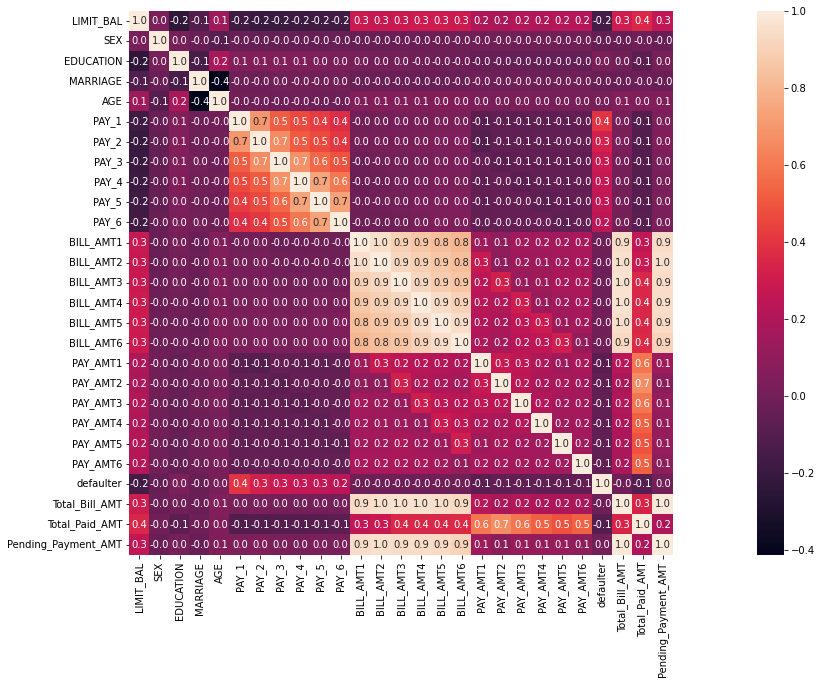

In [252]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

**The above heatmap clearly tells you that the  PAY_1 to PAY_6 variables are the strongest predictors of defaulter which are postively correlated with the target variable.**

**The LIMIT_BAL and PAY_AMT_1 to PAY_AMT_6 variables showing a negative correlation with the target variable defaulter**

**Apart from that,we can find a positive correlation among the features LIMIT_BAL and BILL_AMT**

**A negative correlation between AGE and MARRIAGE**

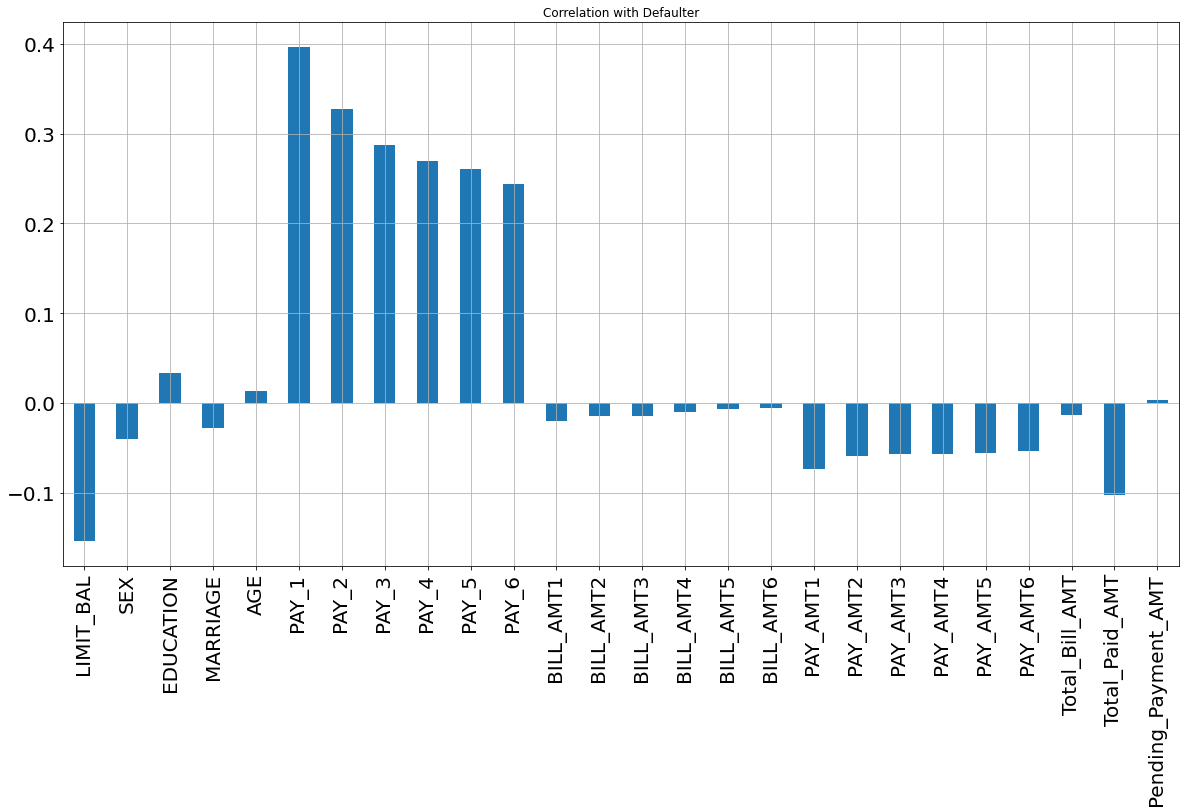

In [253]:
X = credit_df.drop(['defaulter'],axis=1)
X.corrwith(credit_df['defaulter']).plot.bar(figsize = (20, 10), title = "Correlation with Defaulter", 
                                        fontsize = 20,rot = 90, grid = True)


**It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because  it is very important feature for prediction as well.**

**The payment history variable i.e PAY_1 to PAY_6 are the significant features in our classification model**

In [339]:
credit_card_df=credit_df.copy()

**The above correlation graph tells us which all  features are significant and relavent to our target variable. Hence we will be  selecting only those relavent features for our modelling buliding and training.**

In [340]:
credit_card_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT'],
      dtype='object')

In [341]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [342]:
X = credit_card_df[features] #Independent features
y = credit_card_df['defaulter'] #Dependent features

In [343]:
X.shape,y.shape

((29965, 23), (29965,))

In [344]:
X.max()

LIMIT_BAL    1000000
SEX                2
EDUCATION          4
MARRIAGE           3
AGE               79
PAY_1              8
PAY_2              8
PAY_3              8
PAY_4              8
PAY_5              8
PAY_6              8
BILL_AMT1     964511
BILL_AMT2     983931
BILL_AMT3    1664089
BILL_AMT4     891586
BILL_AMT5     927171
BILL_AMT6     961664
PAY_AMT1      873552
PAY_AMT2     1684259
PAY_AMT3      896040
PAY_AMT4      621000
PAY_AMT5      426529
PAY_AMT6      528666
dtype: int64

##10. Handling Imbalance Target Variable(SMOTE)

In [345]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(credit_card_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29965
Resampled dataset shape 46670


##11.Splitting the dataset into training(70%) and test data(30%)

In [346]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [347]:
X_train.shape ,X_test.shape

((37336, 23), (9334, 23))

**Scaling the features using Standard Scalar**

In [349]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[features]=sc.fit_transform(X_train[features])
X_test[features]=sc.transform(X_test[features])

#Model Buliding (Applying Machine Learning Algorithm for Classification Problem)

##**Logistic Regression**

Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.
Logistic regression is used to calculate the probability of a binary event occurring, and to deal with issues of classification

This algorithm is used for the dependent variable that is Categorical. Y is modeled using a sigmoid function that gives output between 0 and 1 for all values of X.

In [350]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [351]:
y_pred = logmodel.predict(X_test)

In [352]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.731305,0.742059,0.707322,0.724274,0.731254


##**K-Nearest Neighbour**

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data

Initialise the value of k

For getting the predicted class, iterate from 1 to total number of training data points

Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. 

Get top k rows from the sorted array

Get the most frequent class of these rows

Return the predicted class

Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [353]:
from sklearn.neighbors import KNeighborsClassifier

In [354]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

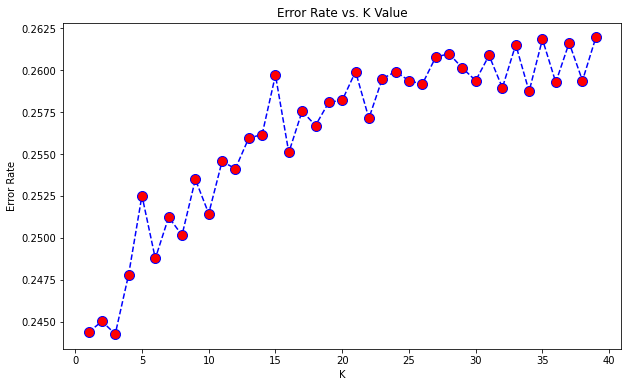

In [355]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [385]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [386]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [387]:
y_pred = knn.predict(X_test)

In [388]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.755732,0.736423,0.794932,0.76456,0.755816


##**Support Vector Machine**

SVM or Support Vector Machine is used in both classification and regression problems and it can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes is as wide as possible.

The C value and kernel are the  key parameters in this SVM Algorithm and we will use these two parameters in hyperparameter tuning using GridsearchCV

In [389]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [390]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [391]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

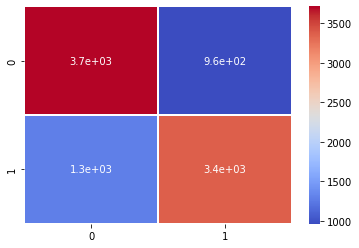

In [392]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [393]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.758624,0.777342,0.723427,0.749416,0.758549
